In [1]:
__author__ = 'Erwin Chen'
# %matplotlib nbagg
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.io import fits
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import cPickle as pickle

C:\Users\jouse_000\Anaconda2_32\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
# load data from fits file
hdulist = fits.open('allStar-v603.fits')
hdulist.info()
tbdata = hdulist[1].data
# APOGEE ID for stars
apogee_ID = tbdata.field('APOGEE_ID')
# Galactic Longitude
l = tbdata.field('GLON')
# Galactic Latitude 
b = tbdata.field('GLAT')
# Right Ascension(J2000)
RA = tbdata.field('RA')
# Declination(J2000)
DEC = tbdata.field('DEC')
# Heliocentric radial velocity
RV = tbdata.field('VHELIO_AVG')
J = tbdata.field('J')
H = tbdata.field('H')
K = tbdata.field('K')
LOGG = tbdata.field('LOGG')
TEFF = tbdata.field('TEFF')
# Proper Motion
PMRA = tbdata.field('PMRA')
PMDEC = tbdata.field('PMDEC')
# 15 elements
elements = np.array(["Al", "Ca", "C", "Fe", "K", "Mg", "Mn", "Na", "Ni", "N", "O", "Si", "S", "Ti", "V"])
AL_H = tbdata.field("AL_H")
CA_H = tbdata.field("CA_H")
C_H = tbdata.field("C_H")
FE_H = tbdata.field('FE_H')
K_H = tbdata.field("K_H")
MG_H = tbdata.field("MG_H")
MN_H = tbdata.field("MN_H")
NA_H = tbdata.field("NA_H")
NI_H = tbdata.field("NI_H")
N_H = tbdata.field("N_H")
O_H = tbdata.field("O_H")
SI_H = tbdata.field("SI_H")
S_H = tbdata.field("S_H")
TI_H = tbdata.field("TI_H")
V_H = tbdata.field("V_H")
# errors for 15 elements
AL_H_ERR = tbdata.field("AL_H_ERR")
CA_H_ERR = tbdata.field("CA_H_ERR")
C_H_ERR = tbdata.field("C_H_ERR")
FE_H_ERR = tbdata.field("FE_H_ERR")
K_H_ERR = tbdata.field("K_H_ERR")
MG_H_ERR = tbdata.field("MG_H_ERR")
MN_H_ERR = tbdata.field("MN_H_ERR")
NA_H_ERR = tbdata.field("NA_H_ERR")
NI_H_ERR = tbdata.field("NI_H_ERR")
N_H_ERR = tbdata.field("N_H_ERR")
O_H_ERR = tbdata.field("O_H_ERR")
SI_H_ERR = tbdata.field("SI_H_ERR")
S_H_ERR = tbdata.field("S_H_ERR")
TI_H_ERR = tbdata.field("TI_H_ERR")
V_H_ERR = tbdata.field("V_H_ERR")

Filename: allStar-v603.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      15   ()              
1                BinTableHDU    324   163278R x 151C   [45A, 34A, 44A, 34A, 18A, 8A, I, 16A, E, E, E, E, E, E, D, D, D, D, J, J, 116A, J, I, E, J, 129A, J, 59A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 2E, 2E, 2E, 2E, 5A, 6A, 4A, I, 7E, 7E, 49E, 49E, 15E, 15E, 15E, 15E, E, E, E, E, E, E, E, E, E, 2A, J, 153A, 7J, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, J, J, J, J, J, J, J, J, J, J, J, J, J, J, J, 15E, 15J, 18A, 12A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 17A, E, E, I, I, E, E, 20A, 737A, 665A, 50J, 50J]   
2                ImageHDU         6   (360,)       int32   
3                BinTableHDU     31   1R x 4C      [105A, 30A, 90A, 15I]   


In [3]:
# get chemical abundances of 15 elements for all available stars
def get_matrix_all():
    # get stars with valid info
    C = np.where(
        (LOGG > -9999.) * (TEFF > -9999.) * (RV < 999999.0) *
        (AL_H > -9999.) * (CA_H > -9999.) * (C_H > -9999.0) *
        (FE_H > -9999.) * (K_H > -9999.0) * (MG_H > - 9999.0) *
        (MN_H > -9999.) * (NA_H > -9999.0) * (NI_H > -9999.) *
        (N_H > -9999.) * (O_H > -9999.0) * (SI_H > -9999.) *
        (S_H > -9999.) * (TI_H > -9999.) * (V_H > -9999.))[0]
    data = []
    data.append(C_H[C] / np.mean(C_H_ERR[C]))
    data.append(FE_H[C] / np.mean(FE_H_ERR[C]))
    data.append(N_H[C] / np.mean(N_H_ERR[C]))
    data.append(O_H[C] / np.mean(O_H_ERR[C]))
    data.append(MG_H[C] / np.mean(MG_H_ERR[C]))
    data.append(SI_H[C] / np.mean(SI_H_ERR[C]))
    data.append(NI_H[C] / np.mean(NI_H_ERR[C]))
    data.append(AL_H[C] / np.mean(AL_H_ERR[C]))
    data.append(CA_H[C] / np.mean(CA_H_ERR[C]))
    data.append(MN_H[C] / np.mean(MN_H_ERR[C]))
    data.append(NA_H[C] / np.mean(NA_H_ERR[C]))
    data.append(S_H[C] / np.mean(S_H_ERR[C]))
    data.append(K_H[C] / np.mean(K_H_ERR[C]))
    data.append(TI_H[C] / np.mean(TI_H_ERR[C]))
    data.append(V_H[C] / np.mean(V_H_ERR[C]))
    data = np.array(data)
    data = data.T
    return data

# get chemical abundances of 15 elements for selected stars
def get_matrix(C):
    data = []
    data.append(C_H[C] / np.mean(C_H_ERR[C]))
    data.append(FE_H[C] / np.mean(FE_H_ERR[C]))
    data.append(N_H[C] / np.mean(N_H_ERR[C]))
    data.append(O_H[C] / np.mean(O_H_ERR[C]))
    data.append(MG_H[C] / np.mean(MG_H_ERR[C]))
    data.append(SI_H[C] / np.mean(SI_H_ERR[C]))
    data.append(NI_H[C] / np.mean(NI_H_ERR[C]))
    data.append(AL_H[C] / np.mean(AL_H_ERR[C]))
    data.append(CA_H[C] / np.mean(CA_H_ERR[C]))
    data.append(MN_H[C] / np.mean(MN_H_ERR[C]))
    data.append(NA_H[C] / np.mean(NA_H_ERR[C]))
    data.append(S_H[C] / np.mean(S_H_ERR[C]))
    data.append(K_H[C] / np.mean(K_H_ERR[C]))
    data.append(TI_H[C] / np.mean(TI_H_ERR[C]))
    data.append(V_H[C] / np.mean(V_H_ERR[C]))
    data = np.array(data)
    data = data.T
    return data

explained variance ratio for all stars
[ 0.904  0.021  0.012  0.011  0.009  0.008  0.006  0.006  0.005  0.005
  0.004  0.004  0.003  0.002  0.001]
['Al' 'Ca' 'C' 'Fe' 'K' 'Mg' 'Mn' 'Na' 'Ni' 'N' 'O' 'Si' 'S' 'Ti' 'V']


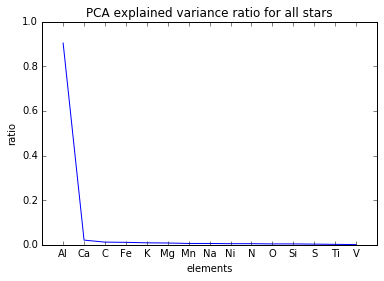

In [4]:
# PCA for all stars
# get data matrix for all stars
data = get_matrix_all()
# PCA
pca = PCA(n_components=15)
pca._fit(data)
print "explained variance ratio for all stars"
# get explained variance ratio 
ratio = np.around(pca.explained_variance_ratio_, decimals=3)
print ratio
print elements
# plot explained variance ratio
f, ax = plt.subplots()
x = range(1,16)
ax.plot(x, ratio)
ax.set_title('PCA explained variance ratio for all stars')
ax.set_xlabel("elements")
ax.set_ylabel("ratio")
ax.set_xticks(x)
ax.set_xticklabels(elements, x=x)
plt.show()

| Al    |  Ca   |  C    |  Fe   |  K    |  Mg   |  Mn   |  Na   |  Ni   |  N    |  O    |  Si   |  S    |  Ti   |  V   |
|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:----:|
| 0.904 | 0.021 | 0.012 | 0.011 | 0.009 | 0.008 | 0.006 | 0.006 | 0.005 | 0.005 | 0.004 | 0.004 | 0.003 | 0.002 | 0.001|

there are 559 known members
there are 185 known members with chemical abundances of all 15 elements
explained variance ratio for known members
[ 0.96899998  0.008       0.006       0.004       0.003       0.002       0.002
  0.001       0.001       0.001       0.001       0.001       0.          0.
  0.        ]
['Al' 'Ca' 'C' 'Fe' 'K' 'Mg' 'Mn' 'Na' 'Ni' 'N' 'O' 'Si' 'S' 'Ti' 'V']


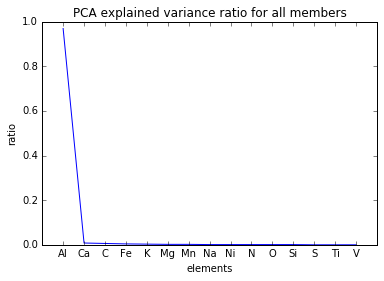

In [5]:
# PCA for all known members
# load known members
known_clusters = np.loadtxt('table4.dat', usecols=(0, 1), dtype=('S', 'S'), unpack=True)
# names of all known clusters
known_clusters_names = known_clusters[1]
# M92, M15, M53, N5466, M2, M13, M3, M5, M107, M71, N2158, N2420, N188, M67, Pleiades, N6819, N6791
# APOGEE IDs for all known members
known_clusters_ID = known_clusters[0]
# get all known members
members = np.array([np.where(ID == apogee_ID)[0][0] for ID in known_clusters_ID])
print "there are %i known members"%(members.size)
# get stars with all 15 elements
C = np.where(
        (LOGG > -9999.) * (TEFF > -9999.) * (RV < 999999.0) *
        (AL_H > -9999.) * (CA_H > -9999.) * (C_H > -9999.0) *
        (FE_H > -9999.) * (K_H > -9999.0) * (MG_H > - 9999.0) *
        (MN_H > -9999.) * (NA_H > -9999.0) * (NI_H > -9999.) *
        (N_H > -9999.) * (O_H > -9999.0) * (SI_H > -9999.) *
        (S_H > -9999.) * (TI_H > -9999.) * (V_H > -9999.))[0]
# get members with all 15 elements
members_15 = np.intersect1d(C, members)
print "there are %i known members with chemical abundances of all 15 elements"%(members_15.size)
# get data matrix for all members with 15 elements
data_members = get_matrix(members_15)
# PCA
pca._fit(data_members)
print "explained variance ratio for known members"
# get explained variance ratio 
ratio = np.around(pca.explained_variance_ratio_, decimals=3)
print ratio
print elements
# plot explained variance ratio
f, ax = plt.subplots()
x = range(1,16)
ax.plot(x, ratio)
ax.set_title('PCA explained variance ratio for all members')
ax.set_xlabel("elements")
ax.set_ylabel("ratio")
ax.set_xticks(x)
ax.set_xticklabels(elements, x=x)
plt.show()

| Al    |  Ca   |  C    |  Fe   |  K    |  Mg   |  Mn   |  Na   |  Ni   |  N    |  O    |  Si   |  S    |  Ti   |  V   |
|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:----:|
| 0.969 | 0.008 | 0.006 | 0.004 | 0.003 | 0.002 | 0.002 | 0.001 | 0.001 | 0.001 | 0.001 | 0.001 | 0.    | 0.    |    0.|

there are 15 stars in M107 with chemical abundances of all 15 elements
explained variance ratio for M107
[ 0.815  0.076  0.05   0.025  0.013  0.009  0.005  0.003  0.002  0.001
  0.001  0.     0.     0.     0.   ]


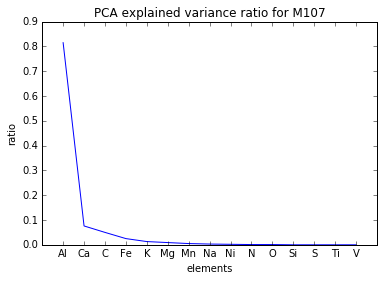

there are 20 stars in M13 with chemical abundances of all 15 elements
explained variance ratio for M13
[ 0.69199997  0.115       0.061       0.04        0.035       0.022       0.016
  0.006       0.004       0.003       0.002       0.001       0.001       0.001
  0.        ]


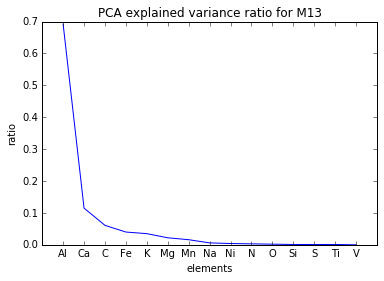

there are 43 stars in M5 with chemical abundances of all 15 elements
explained variance ratio for M5
[ 0.55500001  0.22400001  0.053       0.041       0.034       0.021       0.02
  0.016       0.01        0.007       0.006       0.005       0.004       0.002
  0.002     ]


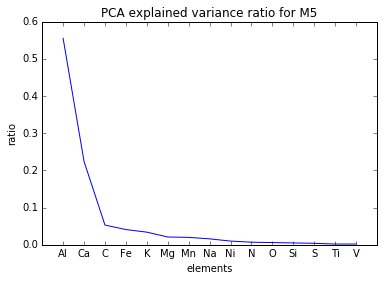

there are 29 stars in N6819 with chemical abundances of all 15 elements
explained variance ratio for N6819
[ 0.73400003  0.11        0.056       0.035       0.024       0.013       0.007
  0.007       0.005       0.004       0.002       0.001       0.001       0.001
  0.        ]


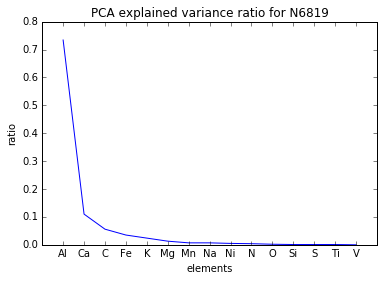

there are 24 stars in M67 with chemical abundances of all 15 elements
explained variance ratio for M67
[ 0.579       0.18700001  0.078       0.047       0.032       0.027       0.021
  0.012       0.006       0.004       0.003       0.002       0.001       0.001
  0.        ]


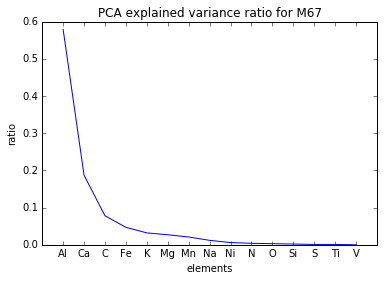

In [7]:
# PCA for every major known clusters
clusters_names = np.array(["M107", "M13", "M5", "N6819", "M67"])
for name in clusters_names:
    # get members of a known cluster
    name_members_ID = known_clusters_ID[np.where(name == known_clusters_names)]
    name_members = np.array([np.where(ID == apogee_ID)[0][0] for ID in name_members_ID])
    name_members = np.intersect1d(name_members, members_15)
    print "there are %i stars in %s with chemical abundances of all 15 elements"%(name_members.size, name)
    # get data matrix for a known cluster
    name_data = get_matrix(name_members)
    # PCA
    pca._fit(name_data)
    print "explained variance ratio for %s"%(name)
    # get explained variance ratio
    ratio = np.around(pca.explained_variance_ratio_, decimals=3)
    print ratio
    # plot explained variance ratio
    f, ax = plt.subplots()
    x = range(1,16)
    ax.plot(x, ratio)
    ax.set_title('PCA explained variance ratio for %s'%name)
    ax.set_xlabel("elements")
    ax.set_ylabel("ratio")
    ax.set_xticks(x)
    ax.set_xticklabels(elements, x=x)
    plt.show()
    

<p><center>M107</center></p>

| Al    |  Ca   |  C    |  Fe   |  K    |  Mg   |  Mn   |  Na   |  Ni   |  N    |  O    |  Si   |  S    |  Ti   |  V   |
|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:----:|
| 0.815 | 0.076 | 0.05  | 0.025 | 0.013 | 0.009 | 0.005 | 0.003 | 0.002 | 0.001 | 0.001 | 0.    | 0.    | 0.    |    0.|

<p><center>M13</center></p>

| Al    |  Ca   |  C    |  Fe   |  K    |  Mg   |  Mn   |  Na   |  Ni   |  N    |  O    |  Si   |  S    |  Ti   |  V   |
|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:----:|
| 0.692 | 0.115 | 0.061 | 0.04  | 0.035 | 0.022 | 0.016 | 0.006 | 0.004 | 0.003 | 0.002 | 0.001 | 0.001 | 0.001 |    0.|

<p><center>M5</center></p>

| Al    |  Ca   |  C    |  Fe   |  K    |  Mg   |  Mn   |  Na   |  Ni   |  N    |  O    |  Si   |  S    |  Ti   |  V   |
|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:----:|
| 0.555 | 0.224 | 0.053 | 0.041 | 0.034 | 0.021 | 0.020 | 0.016 | 0.010 | 0.007 | 0.006 | 0.005 | 0.004 | 0.002 | 0.002|

<p><center>N6819</center></p>

| Al    |  Ca   |  C    |  Fe   |  K    |  Mg   |  Mn   |  Na   |  Ni   |  N    |  O    |  Si   |  S    |  Ti   |  V   |
|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:----:|
| 0.734 | 0.11  | 0.056 | 0.035 | 0.024 | 0.013 | 0.007 | 0.007 | 0.005 | 0.004 | 0.002 | 0.001 | 0.001 | 0.001 |    0.|

<p><center>M67</center></p>

| Al    |  Ca   |  C    |  Fe   |  K    |  Mg   |  Mn   |  Na   |  Ni   |  N    |  O    |  Si   |  S    |  Ti   |  V   |
|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:----:|
| 0.579 | 0.187 | 0.078 | 0.047 | 0.032 | 0.027 | 0.021 | 0.012 | 0.006 | 0.004 | 0.003 | 0.002 | 0.001 | 0.001 |    0.|
